In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# galton.dat
The file galton.dat contains the original data from Galton, which was used to formulate the notion of regression. It comprises measurements of lengths of children and their parents, and the sex of the subjects.

In [2]:
df = pd.read_csv('galton.dat', sep='\t')
df

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1.0,0.0
894,136A,68.5,65.0,M,67.7,8,1.0,0.0
895,136A,68.5,65.0,F,64.0,8,0.0,1.0
896,136A,68.5,65.0,F,63.5,8,0.0,1.0


We can split this data to perform regression to predict the height of the children. The indipendent variables would be the height of the mother and father, and the gender of the child. the dependent variable is the height of the child. in this case it is best to use multilinear regression

# Multilinear regression

In [3]:

# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [4]:
X = df[['father', 'mother', 'male', 'female']]

y = df['height']
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
  
# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(X_train, y_train)
  
# making predictions
predictions = model.predict(X_test)
  
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  4.362536495383154
mean_absolute_error :  1.6218945380090475


In [5]:
X_test['predictions'] = predictions
X_test['actual height'] = y_test


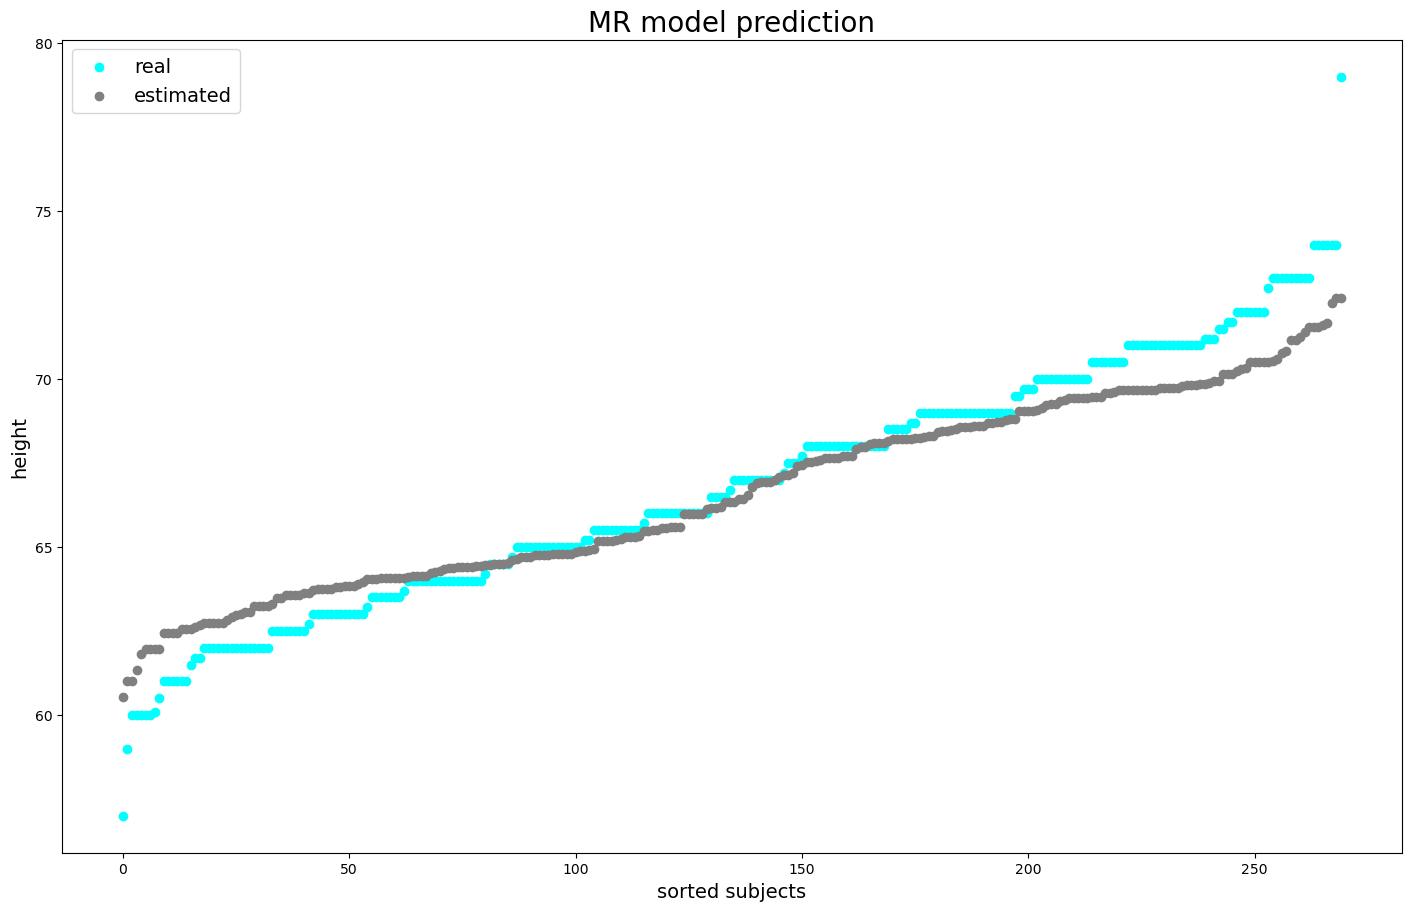

In [6]:
#lets plot the result agains the real data

fig, ax = plt.subplots(layout='constrained', figsize=(14,9))
x = np.arange(270)
ax.scatter(x,sorted(X_test['actual height']),color='cyan', label= 'real')
ax.scatter(x,sorted(X_test['predictions']),color='grey', label='estimated')
ax.legend(fontsize=14)
ax.set_title("MR model prediction", fontsize=20)
ax.set_xlabel("sorted subjects",fontsize=14)
ax.set_ylabel("height", fontsize=14)
plt.show()

In [7]:
#features 
x = df[['father', 'mother', 'male', 'female']]

y = df['height']

model = LinearRegression()
model.fit(x,y)
score = model.score(x,y)
print(f'constant: {model.intercept_}\ncoeff:{model.coef_}\naccuracy:{score*100:.3}%')

constant: 17.9577356740814
coeff:[ 0.40597803  0.32149514  2.61297566 -2.61297566]
accuracy:64.0%


which means for offspring ~y = 17.9577 + 0.40597803* h_father + 0.3215* h_mother + 2.613* is_male + -2.613* is_female

In [8]:
def predict_height(x_df):
    father = x_df[0]
    mother = x_df[1]
    male = x_df[2]
    female = x_df[3]
    constant = model.intercept_
    y = father*model.coef_[0]+mother*model.coef_[1]+male*model.coef_[2]+female*model.coef_[3] + constant
    return y
df["estimated_height"] = [predict_height(i) for i in x.values]
df

,family,father,mother,gender,height,kids,male,female,estimated_height
0,1,78.5,67.0,M,73.2,4,1.0,0.0,73.980160
1,1,78.5,67.0,F,69.2,4,0.0,1.0,68.754209
2,1,78.5,67.0,F,69.0,4,0.0,1.0,68.754209
3,1,78.5,67.0,F,69.0,4,0.0,1.0,68.754209
4,2,75.5,66.5,M,73.5,4,1.0,0.0,72.601479
...,...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1.0,0.0,69.277390
894,136A,68.5,65.0,M,67.7,8,1.0,0.0,69.277390
895,136A,68.5,65.0,F,64.0,8,0.0,1.0,64.051439
896,136A,68.5,65.0,F,63.5,8,0.0,1.0,64.051439


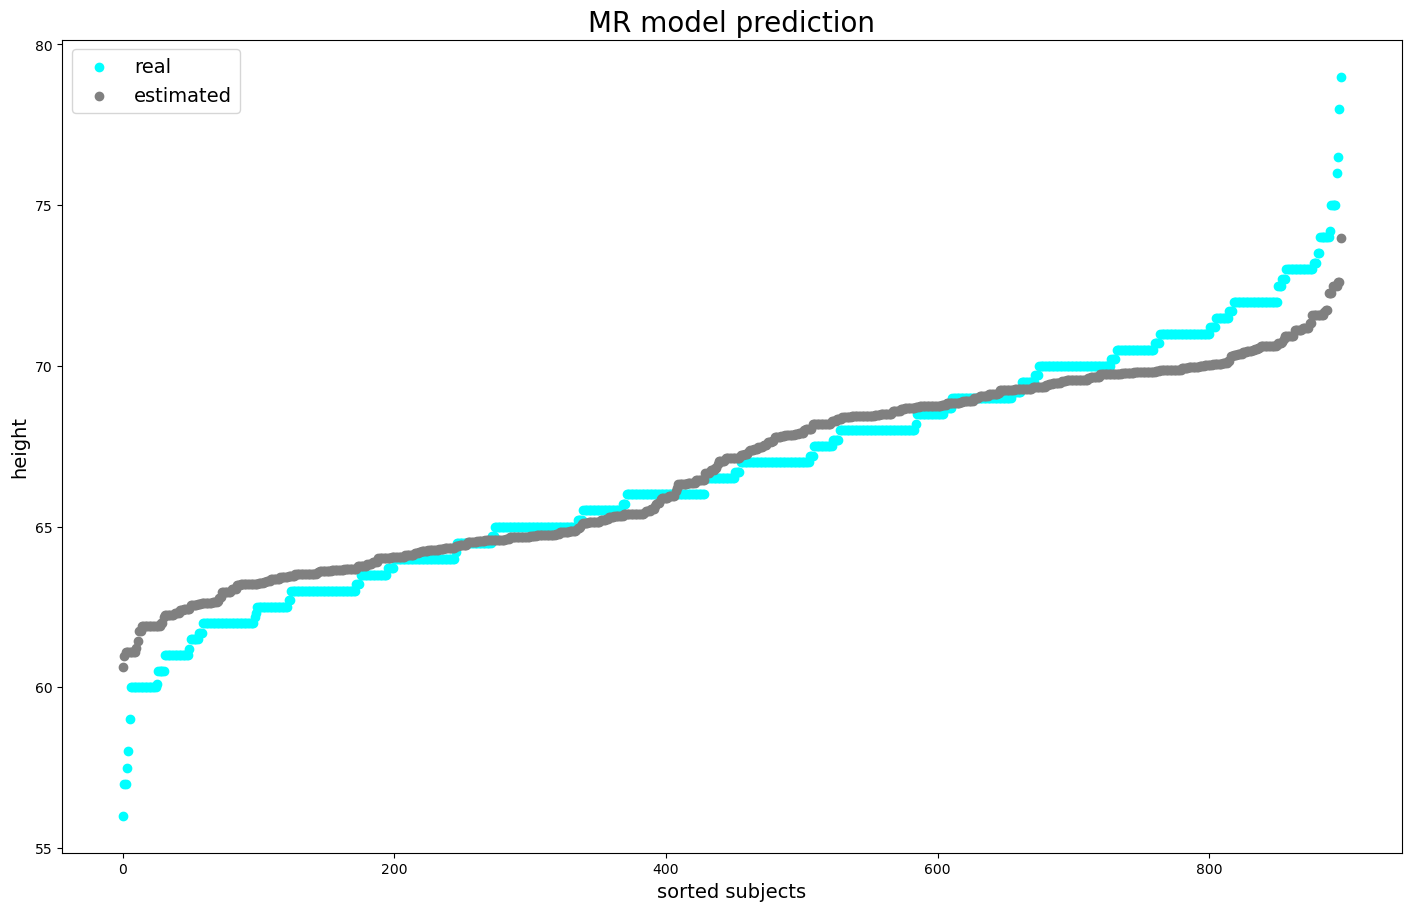

In [9]:
#lets plot the result agains the real data

fig, ax = plt.subplots(layout='constrained', figsize=(14,9))
x = np.arange(898)
ax.scatter(x,sorted(df['height']),color='cyan', label= 'real')
ax.scatter(x,sorted(df['estimated_height']),color='grey', label='estimated')
ax.legend(fontsize=14)
ax.set_title("MR model prediction", fontsize=20)
ax.set_xlabel("sorted subjects",fontsize=14)
ax.set_ylabel("height", fontsize=14)
plt.show()


# dataset 2: 
The file connectome_vectorized.csv.gz comprises brain connectivity data for men and women. Each row consists of boolean values indicating whether a connection between two brain areas is present or absent. Only connections with variance among the subjects are included, so there are no connections that are present or absent in all subjects. The last column indicates whether the subject is male or female. A relevant research question is whether there are differences in brain connection patterns between men and women.

In [15]:

from sklearn.manifold import MDS

In [16]:
conn_df = pd.read_csv("connectome_vectorized.csv.gz")
conn_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,93139,93140,93141,93142,93143,93144,93145,93146,93147,sex
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,F
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,1,1,1,M
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,M
3,3,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,1,M
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,M
92,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,F
93,93,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,1,1,F
94,94,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,M


The data indicates wheither a connection between two brain areas exists. this could be seen as a graph which we could use Spectral graph partitioning for which is a application of PCA on a graph. the graph is represented as a laplacian matrix

In [17]:
conn_values = conn_df.values[:, 1:-1]
conn_values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=object)

In [18]:
mds = MDS(3)
factor_scores = mds.fit_transform(conn_values)

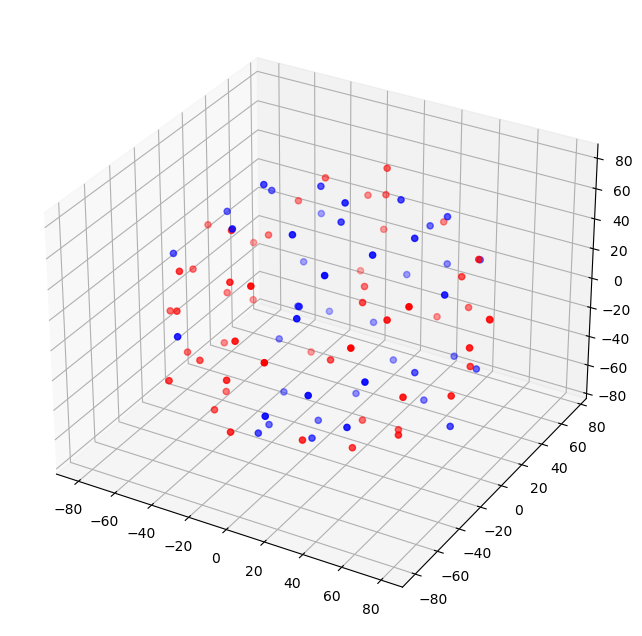

In [23]:
import seaborn as sns
dict_color = {'F': 'red', 'M': 'blue'}
x = [row[0] for row in factor_scores]
y = [row[1] for row in factor_scores]
z = [row[2] for row in factor_scores]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z, c=conn_df['sex'].map(dict_color))
plt.show()

# Dataset 3: CLEARLY my depression is not that high yet
The file transhydrogenase.csv.gz contains molecular dynamics simulation data of wildtype and mutant forms of the protein transhydrogenase (TH). TH is a dimeric integral membrane enzyme in mitochondria and prokaryotes that couples proton translocation across a membrane with hydride transfer between NAD(H) and NADP(H) in soluble domains. This process involves conformational changes in the protein. Mutations may also affect the conformation and can thus modify the efficiency of the protein. This dataset contains conformations of TH sampled over time using molecular dynamics simulations. Each row corresponds to one conformation. The first field of a row contains a label indicating what mutation is present (WT for wild-type). The rest of the columns contain the coordinates of the atoms in vectorized form. All structures have already been aligned to a common frame of reference using Procrustes analysis. The coordinates are thus suitable for direct further analysis. A relevant question is whether the different variants can be distinguished in terms of conformation and dynamics (covariance structure).

In [24]:
hydro_df = pd.read_csv("transhydrogenase.csv.gz")
hydro_df

,Unnamed: 0,variant,x0,y0,z0,x1,y1,z1,x2,y2,...,z750,x751,y751,z751,x752,y752,z752,x753,y753,z753
0,0,WT,2.232662,-0.175234,0.445381,1.430379,0.362950,0.900745,1.328980,0.169134,...,-6.055492,2.278352,-1.216520,-7.968948,1.648216,-0.388278,-7.311485,-0.185457,2.266832,-9.651554
1,1,WT,3.128979,0.057618,1.338539,2.272053,-0.152276,1.830578,1.497686,-0.200720,...,-5.384182,2.084931,-0.777718,-6.925377,1.764271,-0.837972,-5.649639,-1.866464,1.002639,-7.600162
2,2,WT,3.667753,-0.210762,0.915047,2.665825,0.011532,1.561668,1.802264,-0.424967,...,-6.950081,3.190837,-1.746283,-8.502846,2.848035,-1.168078,-7.571968,-0.521151,0.882258,-9.594967
3,3,WT,3.703590,-0.266571,1.048084,2.949226,0.039815,1.500355,2.122021,-0.107710,...,-5.943760,3.890735,-0.656552,-7.033615,3.355130,-0.573520,-5.763386,0.288879,1.581337,-7.494667
4,4,WT,1.998403,0.659392,0.445759,1.526339,0.522686,0.568974,0.987137,0.083764,...,-6.176762,4.113041,-0.970990,-7.908390,3.842464,-0.370223,-7.094711,0.451301,1.645195,-8.377224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,6120,M97V,-2.669084,-2.427289,1.191936,-3.375092,-2.794824,1.576153,-3.153336,-2.452126,...,-2.579731,2.867694,-1.671361,-4.697720,3.653665,-0.951294,-4.252853,1.799057,1.716810,-6.352692
6121,6121,M97V,-2.534512,-3.458969,1.781811,-2.962809,-3.648747,1.954781,-2.387674,-2.991880,...,-2.592834,1.196180,-2.404241,-4.204964,1.558762,-1.355719,-4.147633,-1.555199,0.740530,-5.365902
6122,6122,M97V,-3.776776,-1.480571,1.286007,-3.855790,-2.406792,1.365089,-4.006705,-2.379490,...,-2.118729,1.417145,-1.798042,-4.020084,1.731073,-1.428401,-3.184464,-1.886903,0.396953,-3.909542
6123,6123,M97V,-3.246824,-3.914128,1.616825,-3.506781,-3.975917,1.706188,-3.089157,-3.196330,...,-2.978657,2.836495,-2.983917,-4.694382,3.326640,-2.095344,-4.414188,1.949281,0.512129,-6.511025


# dataset 4:
The file reflectance and transmission spec measurements.xlsx contains Near-InfraRed (NIR) spectra measured on white feathers from a variety of birds (50 species). These data come from the paper 'The microstructure of white feathers predicts their visible and near-infrared reflectance properties'. The conclusion of the paper was that the 'results highlight the potential for adaptive variation in NIR reflectance mediated by feather structure, which may inform the design of functional materials to control light and heat.' As such, these measurements are a starting point for bio-inspired design of materials. NIR spectra (like other spectra) can be considered 1D images. Note that 1. the file can be read using the read.excel function from pandas and 2. the data are transposed: the first column contains the wavelengths measured and the other columns contain the observations. 

In [25]:
from sklearn.decomposition import NMF